<p style="text-align:center;"><span style="font-size:80px;"><span style="color:black"><span style="font-family:cursive;"><span style="font-weight:1000">Hi Everybody 👋🏻</span></span></span></span></p>

<div style="border-radius:10px; padding: 15px; background-color: #FDF7E4; text-align:left; font-size:120%">

<h4 align="left"><span style="font-weight:900; font-size:160%"><font color=#86A789>Description:</font></span></h4>


<h4 align="left"><span style="font-weight:600; font-size:110%"><font color=#86A789>Objective:</font></span></h4>
Countries can be categorized based on socioeconomic and health indicators that measure a nation's overall level of development. Key factors include economic prosperity, education, healthcare access, and quality of life. By analyzing metrics in areas like income, literacy, life expectancy, and standards of living, countries can be grouped and compared in terms of their developmental progress. This allows for identifying development gaps and priorities for improvement across different country income levels and regions. Examining socioeconomic and health criteria provides insights into a nation's human development capacity and areas requiring policy attention.

<h4 align="left"><span style="font-weight:600; font-size:110%"><font color=#86A789>Problem:</font></span></h4>
HELP International is a dedicated international humanitarian NGO focused on combating poverty and ensuring access to essential resources and relief in underprivileged nations, particularly in times of disasters and natural calamities. Our organization actively implements various operational projects and engages in advocacy efforts to increase awareness and secure funding for our cause.

<h4 align="left"><span style="font-weight:600; font-size:110%"><font color=#86A789>Goal:</font></span></h4>
HELP International has raised $10 million that its CEO now needs to strategically allocate to countries most in need of aid. As a data scientist, my job is to analyze key socioeconomic and health factors to categorize countries by level of development. This will allow me to identify countries facing the biggest development challenges and requiring the most attention and aid money. By examining metrics like income distribution, poverty rates, education levels, and healthcare access and outcomes, I can determine where people lack basic necessities and opportunities. My analysis aims to highlight countries with the lowest scores on human development indexes so the CEO can focus aid efforts on those nations facing the most pressing and profound development needs. Effective use of data on socioeconomic and health disparities will allow me to advise on directing the aid money in a way that maximizes positive impact on vulnerable populations worldwide.

<a id="setup"></a>
<h1><p style="padding:15px;background-color:#FDF7E4 ;margin:0;color:#191919;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #86A789">Table Of Content</p></h1>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">

<h2><span style="text-align:center; font-weight:bolder; color:#86A789">Table of Contents</span></h2>

 *  **[Step 1 | Nessesary Libraries](#s1)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#lib_config)
 *  **[Step 2 | Dataset](#dataset)**
    -  [2.1 | Load dataset](#load_data)
 *  **[Step 3 | Preprocessing](#Preprocessing)**
    -  [3.1 | Missing Values](#miss)
    -  [3.2 | Duplicated values](#dup)
    -  [3.3 | Derived Metrices](#d_Metrices)
    -  [3.4 | Plots](#plots)
    -  [3.5 | Outliers](#out)
    -  [3.6 | Normalization](#norm)
 *  **[Step 4 | PCA](#pca)**
    -  [4.1 | Initializing PCA](#ipca)
 *  **[Step 5 | Clustring Models](#model)**
    -  [5.1 | Kmeans](#km)
    -  [5.2 | KMeans n_clusters=3](#km3)
 *  **[Author](#author)**

<a id="s1"></a>
<h1><p style="padding:15px;background-color:#FDF7E4 ;margin:0;color:#191919;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #86A789">Step 1 | Nessasary Libraries</p></h1>

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍If you don't have libraries, then you should install them. (ex. pip install pandas)
</span></h5>

<a id="import"></a>
<h2><b><span style="color:#191919">Step 1.1 | </span><span style="color:#86A789">Import Libraries</span></b></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from kneed import KneeLocator

import warnings

<a id="lib_config"></a>
<h2><b><span style="color:#191919">Step 1.2 | </span><span style="color:#86A789">Library configurations</span></b></h2>

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('ggplot')

<a id="dataset"></a>
<h1><p style="padding:15px;background-color:#FDF7E4 ;margin:0;color:#191919;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #86A789">Step 2 | Dataset</p></h1>

<a id="load_data"></a>
<h2><b><span style="color:#191919">Step 2.1 | </span><span style="color:#86A789">Load dataset</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%%">
    📍Here, we import data from a csv file, using pandas library.
    </span></h5>

In [3]:
data = pd.read_csv('Country-data.csv')
df = pd.DataFrame(data)
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:550; font-size:110%%">
    📍<code>.shape</code> returns the row and column count of the DataFrame in a simple tuple format.</br></br>
    📍<code>.head</code> returns a subset of rows from the top of the DataFrame, allowing convenient previewing of the start of the data.</br></br>
    📍<code>.info</code>provides a succinct summary of a DataFrame. It gives concise information about column names, data types, non-missing values and memory usage.</br></br>
    📍<code>.describe(include='all')</code> provides a high-level summary of numeric and object columns in a DataFrame.
</span></h5>

In [4]:
df.shape

(167, 10)

In [5]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍There is 167 samples, with no-null values. ✅
</span></h5>

In [7]:
df.describe(include='all')

country  child_mort     exports      health     imports  \
count           167  167.000000  167.000000  167.000000  167.000000   
unique          167         NaN         NaN         NaN         NaN   
top     Afghanistan         NaN         NaN         NaN         NaN   
freq              1         NaN         NaN         NaN         NaN   
mean            NaN   38.270060   41.108976    6.815689   46.890215   
std             NaN   40.328931   27.412010    2.746837   24.209589   
min             NaN    2.600000    0.109000    1.810000    0.065900   
25%             NaN    8.250000   23.800000    4.920000   30.200000   
50%             NaN   19.300000   35.000000    6.320000   43.300000   
75%             NaN   62.100000   51.350000    8.600000   58.750000   
max             NaN  208.000000  200.000000   17.900000  174.000000   

               income   inflation  life_expec   total_fer           gdpp  
count      167.000000  167.000000  167.000000  167.000000     167.000000  
unique            NaN         NaN         NaN         NaN            NaN  
top               NaN         NaN         NaN         NaN            NaN  
freq              NaN         NaN         NaN         NaN            NaN  
mean     17144.688623    7.781832   70.555689    2.947964   12964.155689  
std      19278.067698   10.570704    8.893172    1.513848   18328.704809  
min        609.000000   -4.210000   32.100000    1.150000     231.000000  
25%       3355.000000    1.810000   65.300000    1.795000    1330.000000  
50%       9960.000000    5.390000   73.100000    2.410000    4660.000000  
75%      22800.000000   10.750000   76.800000    3.880000   14050.000000  
max     125000.000000  104.000000   82.800000    7.490000  105000.000000

<a id="Preprocessing"></a>
<h1><p style="padding:15px;background-color:#FDF7E4 ;margin:0;color:#191919;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #86A789">Step 3 | Preprocessing</p></h1>

<a id="miss"></a>
<h2><b><span style="color:#191919">Step 3.1 | </span><span style="color:#86A789">Missing values</span></b></h2>

In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍There is no Missing values in Dataframe. ✅
</span></h5>

<a id="dup"></a>
<h2><b><span style="color:#191919">Step 3.2 | </span><span style="color:#86A789">Duplicated values</span></b></h2>

In [9]:
df_duplicated = df.copy()
df_duplicated.drop_duplicates(subset=None, inplace=True)

df_duplicated.shape

(167, 10)

In [10]:
df.shape

(167, 10)

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍There is no duplicated values in Dataframe. ✅
</span></h5>

<a id="d_Metrices"></a>
<h2><b><span style="color:#191919">Step 3.3 | </span><span style="color:#86A789">Derived Metrices</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5.5><span style="align:left; color:black; font-weight:550; font-size:110%">
    📍To gain a more accurate understanding of a country's development and economic performance, it is essential to move beyond percentage values and consider actual values of key indicators such as imports, exports, and health spending in relation to their GDP per capita. Relying solely on percentage values can be misleading, as it fails to account for the significant disparities that may exist between countries. For instance, comparing the export percentages of Austria and Belarus might suggest a similar level of economic activity, but their stark differences in GDP per capita reveal a substantial gap in their overall development. By examining the actual values of these indicators, a clearer and more comprehensive picture of a country's economic strength and well-being can be obtained.
</span></h5>

In [11]:
df[df['country'] == 'Belarus']

country  child_mort  exports  health  imports  income  inflation  \
14  Belarus         5.5     51.4    5.61     64.5   16200       15.1   

    life_expec  total_fer  gdpp  
14        70.4       1.49  6030

In [12]:
df[df['country'] == 'Austria']

country  child_mort  exports  health  imports  income  inflation  \
8  Austria         4.3     51.3    11.0     47.8   43200      0.873   

   life_expec  total_fer   gdpp  
8        80.5       1.44  46900

In [13]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [14]:
df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [15]:
df.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

<a id="plots"></a>
<h2><b><span style="color:#191919">Step 3.3 | </span><span style="color:#86A789">Plots</span></b></h2>

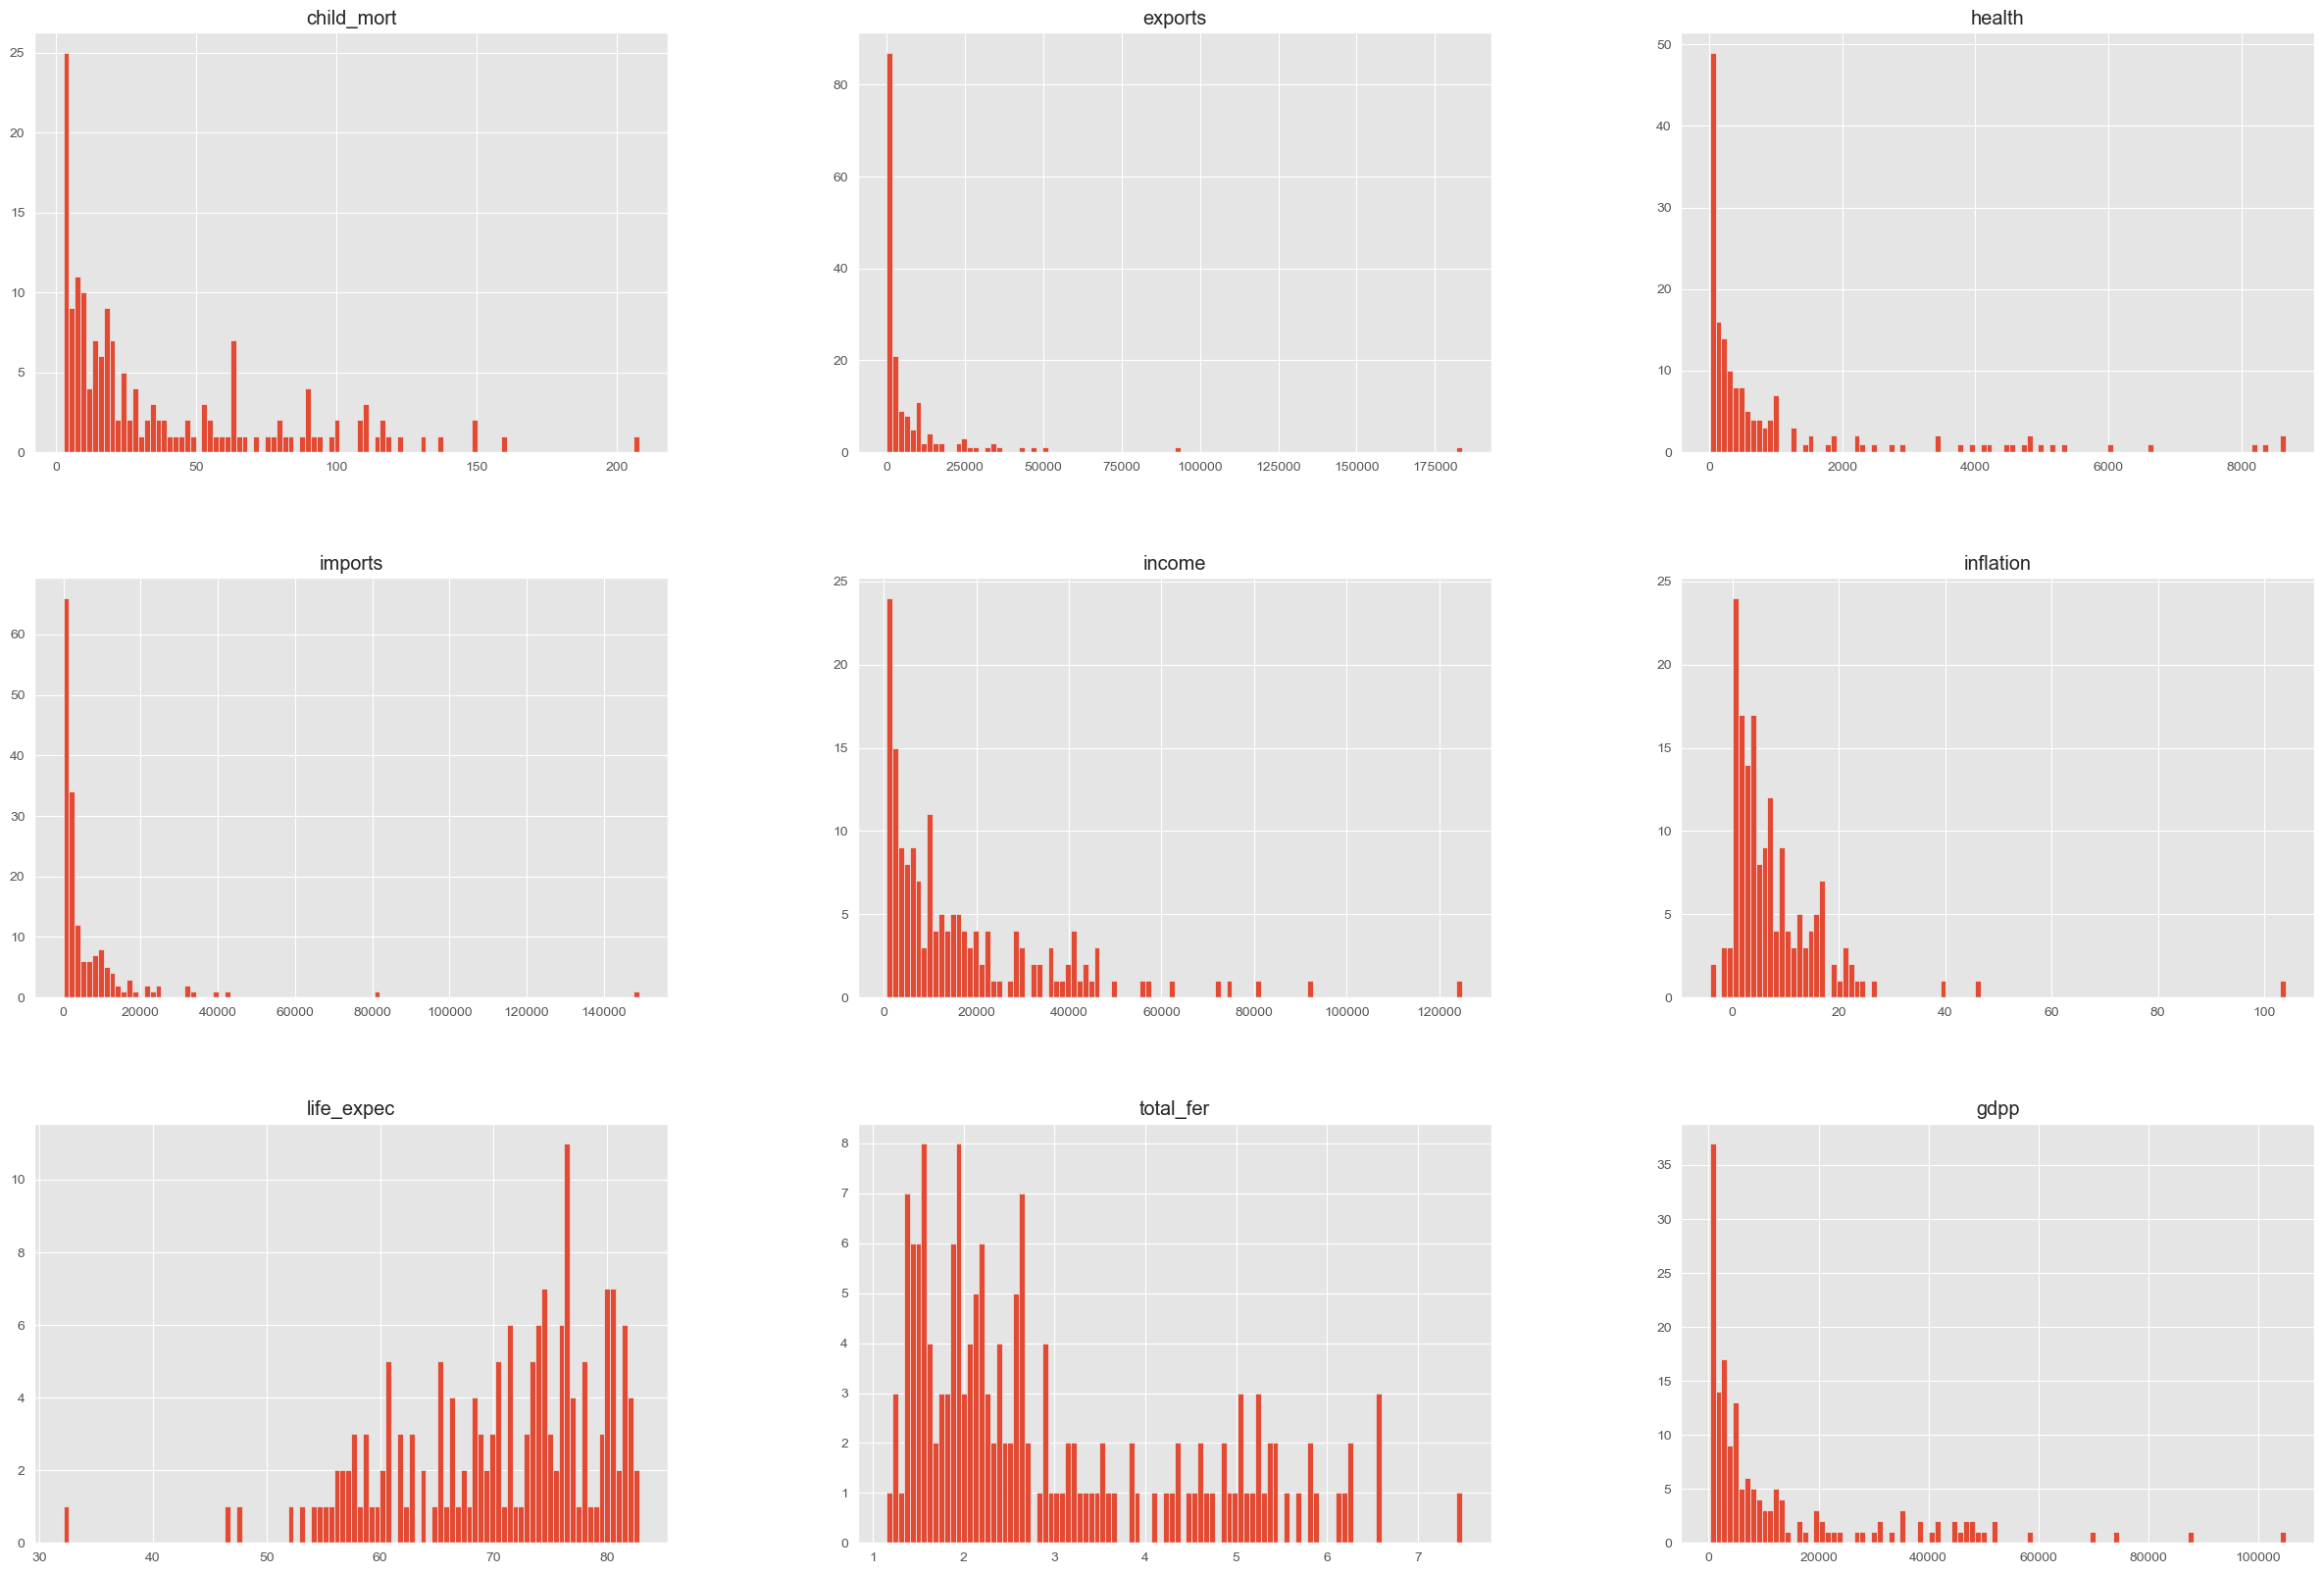

In [16]:
df.hist(bins=100,figsize=(30,20))
plt.show()

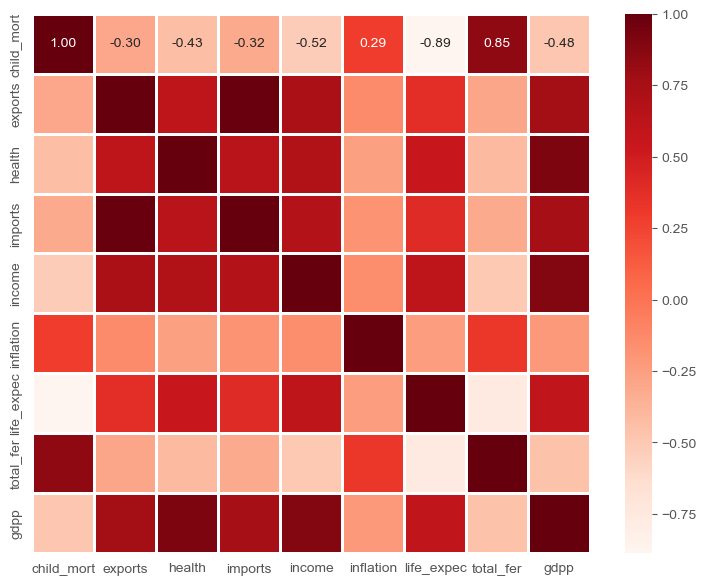

In [17]:
plt.figure(figsize=(9, 7))
sns.heatmap(data=df.iloc[:, 1:].corr(), annot=True, fmt=".2f", linewidth=0.75, cmap='Reds')
plt.show()

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍The country column is not being considered when creating the density plot, since that column is not used to generate the density visualization.✅
</span></h5>

In [18]:
density_features=df.columns[1:]
density_features

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [19]:
for i in enumerate(density_features):
    print(i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍 Visusalization of density_features with <code>histplot(data, stat='density'), kde=True</code> to find data distribiution.✅
</span></h5>

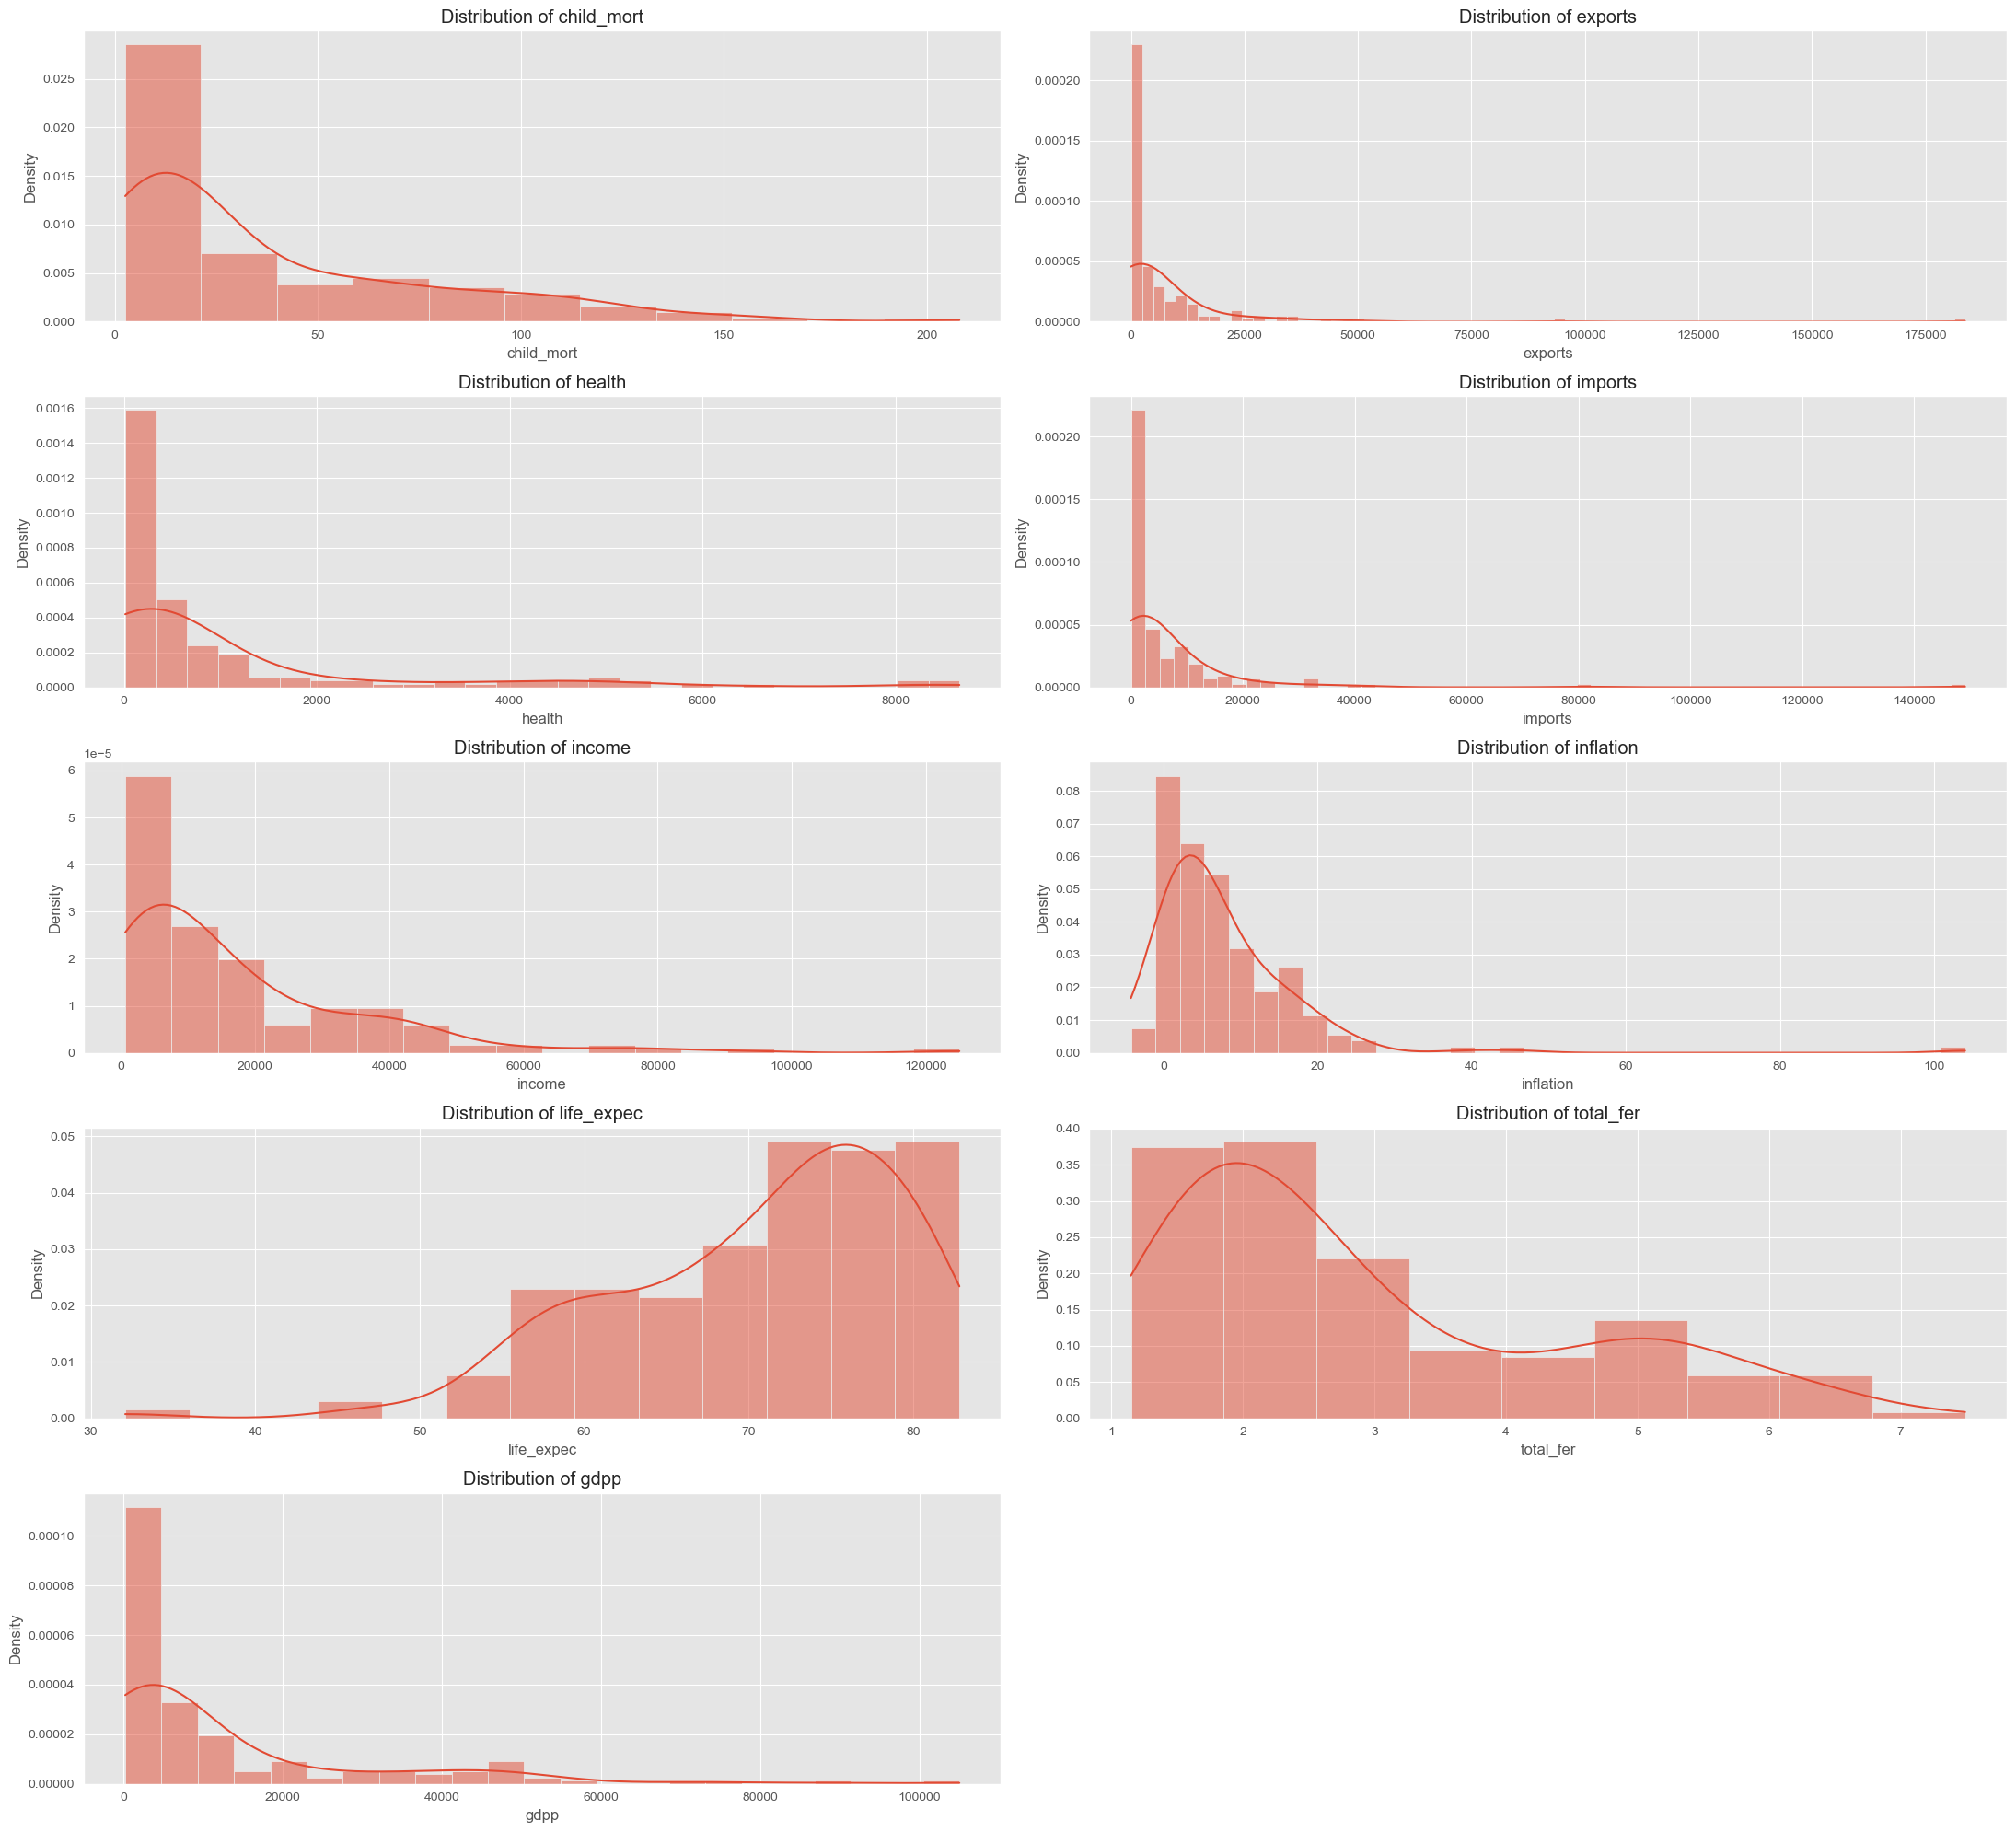

In [20]:
plt.figure(figsize=(22, 20))
for i, feature in enumerate(density_features):
    plt.subplot(5, 2, i+1)
    sns.histplot(df[feature], stat="density", kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

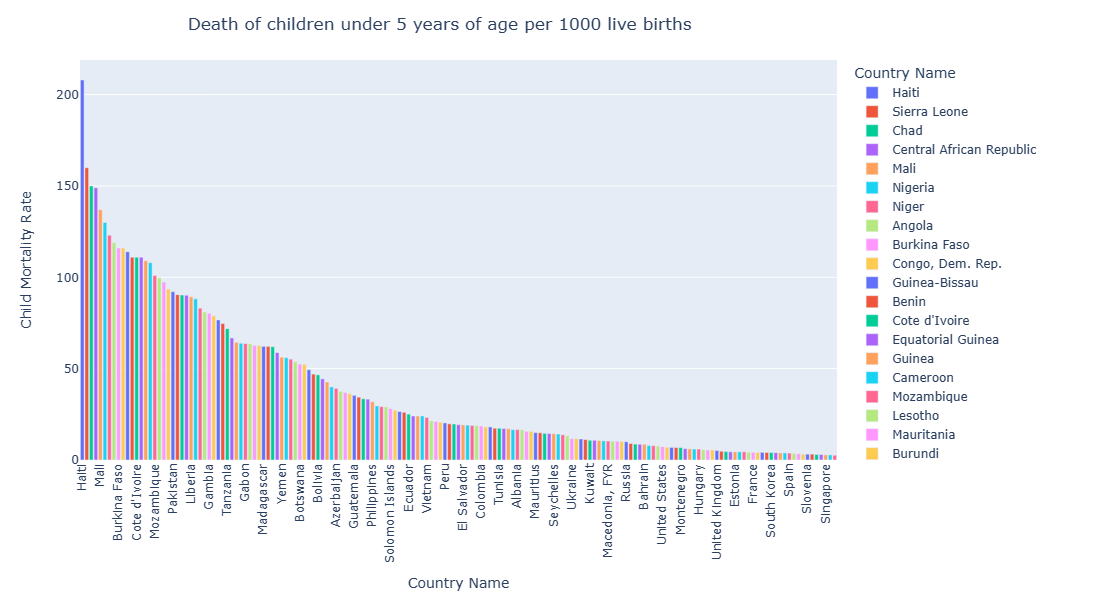

In [21]:
child_mort = df[['country','child_mort']].sort_values('child_mort', ascending=False)

fig = px.bar(child_mort, x='country', y='child_mort', color='country', labels={'country': 'Country Name', 'child_mort': 'Child Mortality Rate'})
fig.update_layout(title = 'Death of children under 5 years of age per 1000 live births',
                      title_x=0.4,
                      xaxis={'tickangle': 270},
                      width=1000, height=600)
fig.show()

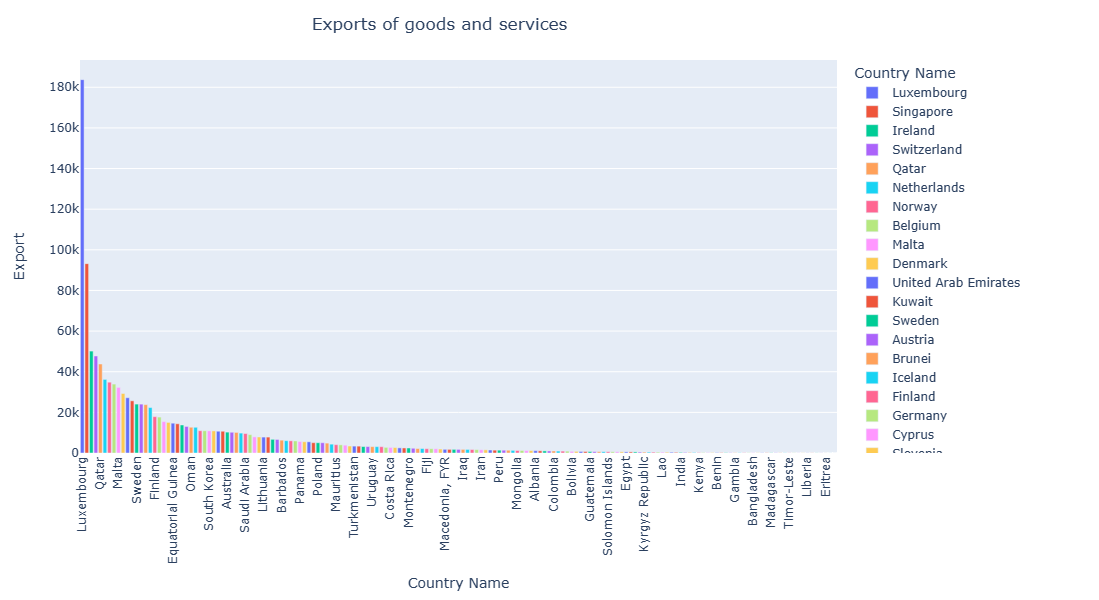

In [22]:
export = df[['country','exports']].sort_values('exports', ascending=False)

fig = px.bar(export, x='country', y='exports', color='country', labels={'country': 'Country Name', 'exports': 'Export'})
fig.update_layout(title = 'Exports of goods and services',
                      title_x=0.4,
                      xaxis={'tickangle': 270},
                      width=1000, height=600)
fig.show()

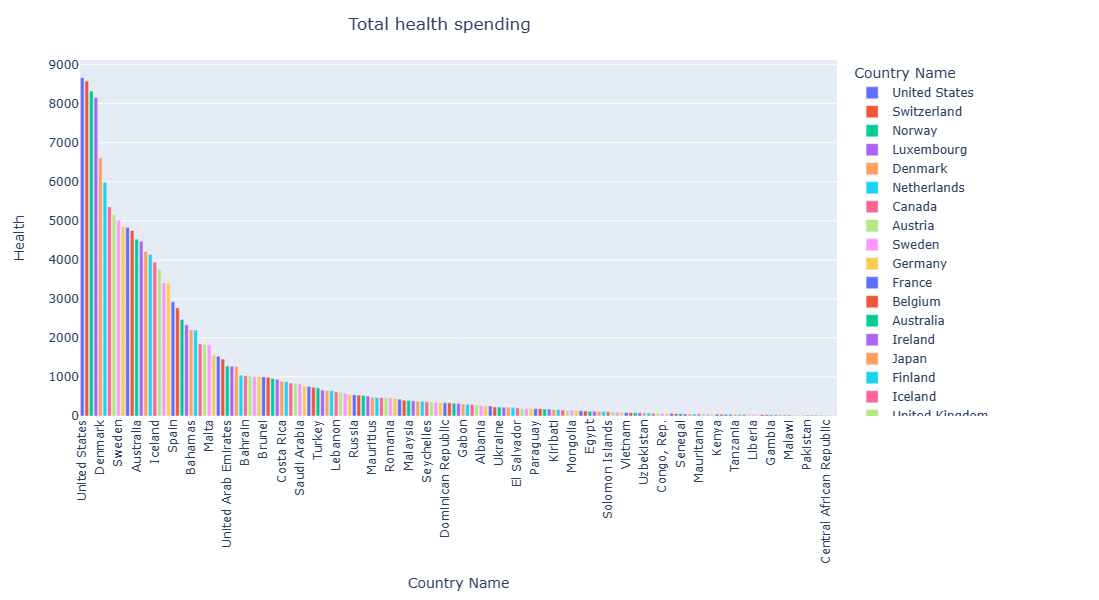

In [23]:
health = df[['country','health']].sort_values('health', ascending=False)

fig = px.bar(health, x='country', y='health', color='country', labels={'country': 'Country Name', 'health': 'Health'})
fig.update_layout(title = 'Total health spending',
                    title_x=0.4,
                    xaxis={'tickangle': 270},
                    width=1000, height=600)
fig.show()

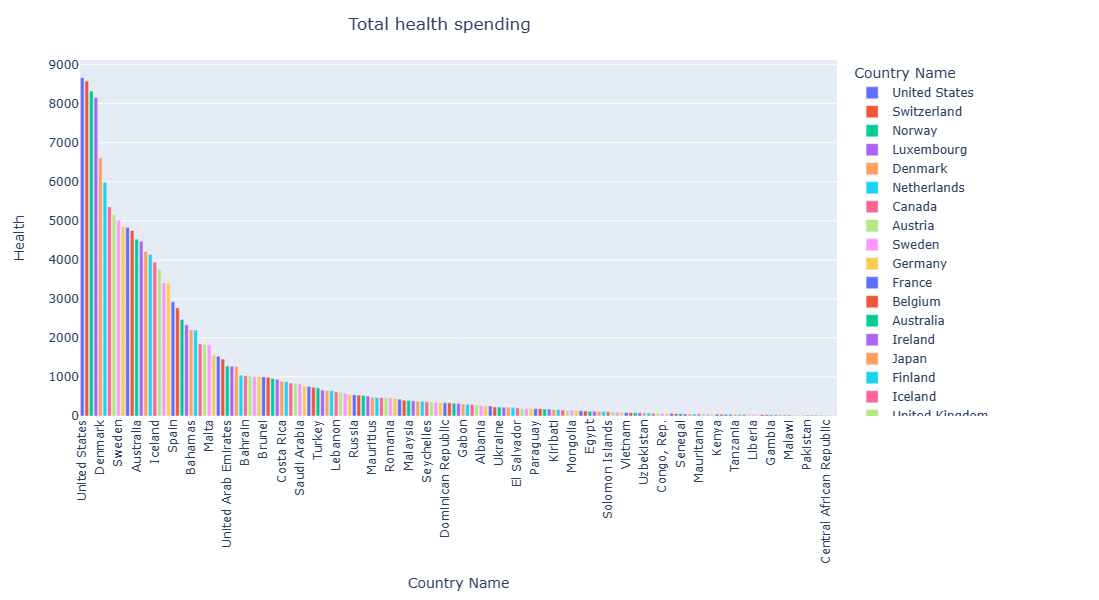

In [24]:
imports = df[['country','health']].sort_values('health', ascending=False)

fig = px.bar(health, x='country', y='health', color='country', labels={'country': 'Country Name', 'health': 'Health'})
fig.update_layout(title = 'Total health spending',
                    title_x=0.4,
                    xaxis={'tickangle': 270},
                    width=1000, height=600)
fig.show()

<a id="out"></a>
<h2><b><span style="color:#191919">Step 3.5 | </span><span style="color:#86A789">Outliers</span></b></h2>

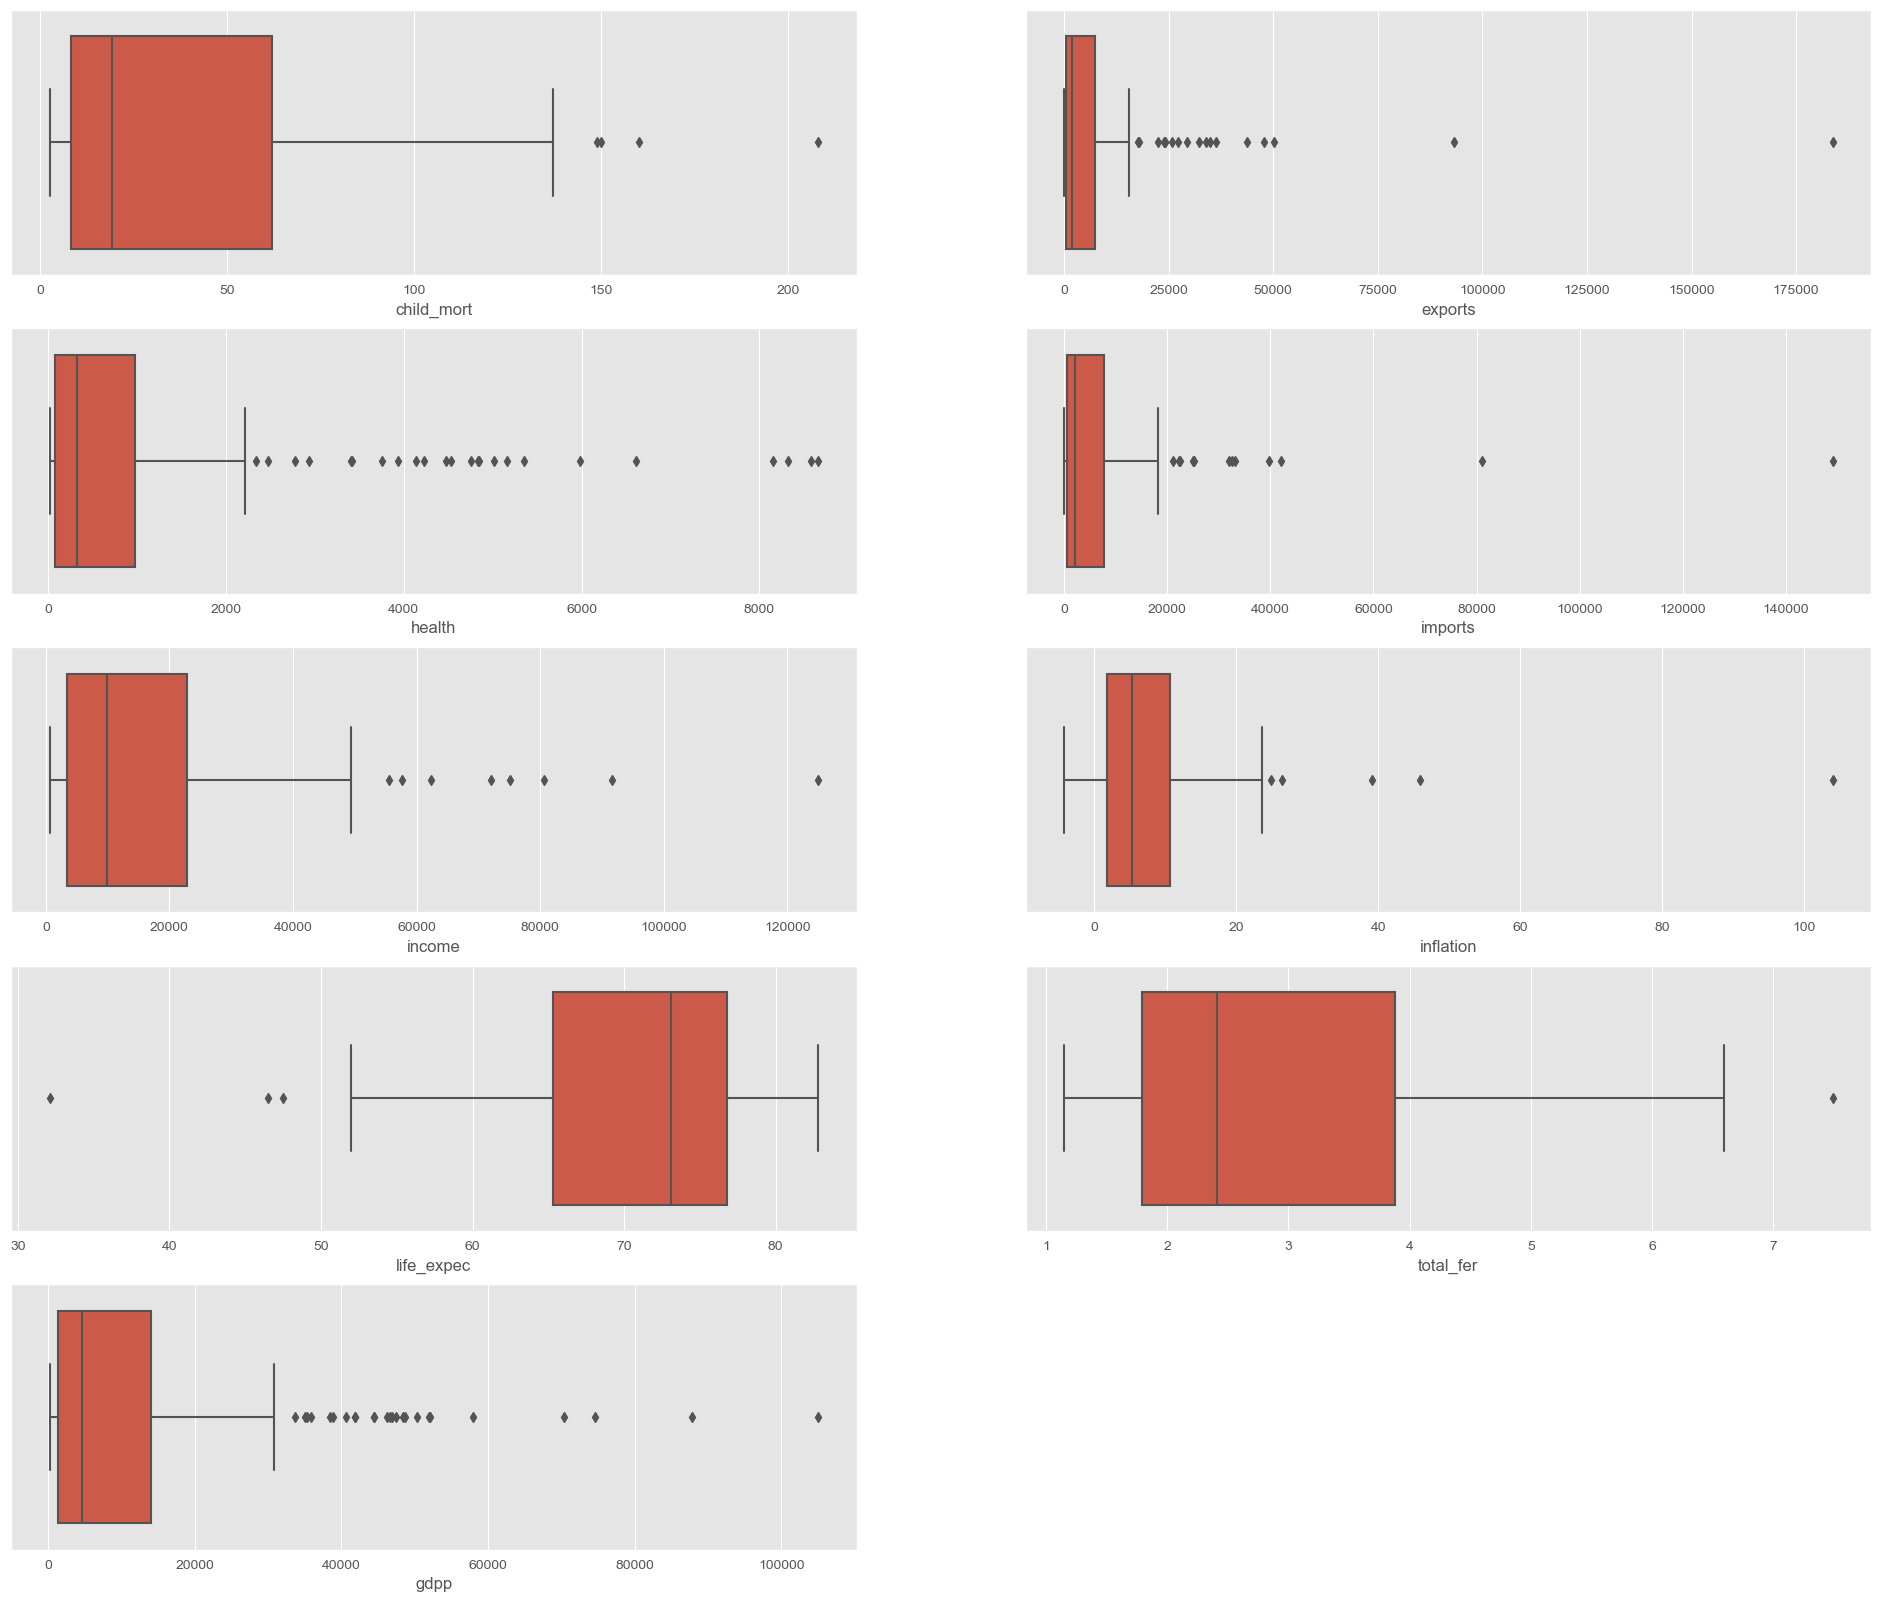

In [25]:
plt.figure(figsize=(24,20))
for i in enumerate(density_features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x= i[1], data = df)

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h4><span style="align:left; color:black; font-weight:550; font-size:110%%">
    📍Based on the <code>.boxplot</code>  information, we can make the following inferences and outline the required outlier treatment:
    </span></h4>
<h5><span style="align:left; color:black; font-weight:102; font-size:110%%">
    1️⃣ Child Mortality: There are outliers on the higher end, indicating countries with high child mortality rates. These countries are the potential targets for aid, so no outlier treatment is necessary.</br></br>
    2️⃣ Exports: There are many outliers on the higher end. To address this, we can cap the outliers at the 95th percentile value.</br></br>
    3️⃣ Health: Similarly, there are outliers on the higher end for health expenditure. Capping these outliers at the 95th percentile value would be appropriate.</br></br>
    4️⃣ Imports: Many countries heavily depend on imports, resulting in outliers on the higher end. Capping these outliers at the 95th percentile value would be suitable.</br></br>
    5️⃣ Income: There are numerous outliers on the higher end for income. Since the focus is on identifying low-income countries for aid, capping the outliers at the 95th percentile value is recommended.</br></br>
    6️⃣ Inflation: Outliers in the higher range of inflation exist. To address this, capping the outliers at the 95th percentile value would be appropriate.</br></br>
    7️⃣ Life Expectancy: There are some outliers on the lower end for life expectancy. Capping these outliers at the 5th percentile value is recommended.</br></br>
    8️⃣ Total Fertility: There is a single outlier on the higher end for total fertility. Capping this outlier at the 95th percentile value would be suitable.</br></br>
    9️⃣ GDP per capita (GDPP): Many outliers exist on the higher end for GDPP. Since the goal is to identify countries with low GDPP for aid, capping the outliers at the 95th percentile value is advised.</br></br>
    ⚠️ Considering the limited data available, it is not advisable to remove or drop rows as it may lead to the exclusion of important countries in need of aid. Therefore, capping the outliers as described above would be a more appropriate approach.
</span></h5>

In [26]:
# calculate the values of 99th percentile for exports, health, imports, income, inflation, total_fer, gdpp
q4_exports= df['exports'].quantile(.95)
q4_imports= df['imports'].quantile(.95)
q4_health= df['health'].quantile(.95)
q4_income= df['income'].quantile(.95)
q4_inflation= df['inflation'].quantile(.95)
q4_total_fer= df['total_fer'].quantile(.95)
q4_gdpp= df['gdpp'].quantile(.95)

# calculate the values of 1st percentile for life_expec
q1_life_expec= df['life_expec'].quantile(.05)

In [27]:
#perform Outlier capping
df['exports'][df['exports']>= q4_exports] = q4_exports
df['imports'][df['imports']>= q4_imports] = q4_imports
df['health'][df['health']>= q4_health] = q4_health
df['income'][df['income']>= q4_income] = q4_income
df['inflation'][df['inflation']>= q4_inflation] = q4_inflation
df['total_fer'][df['total_fer']>= q4_total_fer] = q4_total_fer
df['gdpp'][df['gdpp']>= q4_gdpp] = q4_gdpp

df['life_expec'][df['life_expec']<= q1_life_expec] = q1_life_expec

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍 Rechecking the <code>.boxplot</code> information to determine if outliers have been removed or not.
</span></h5>

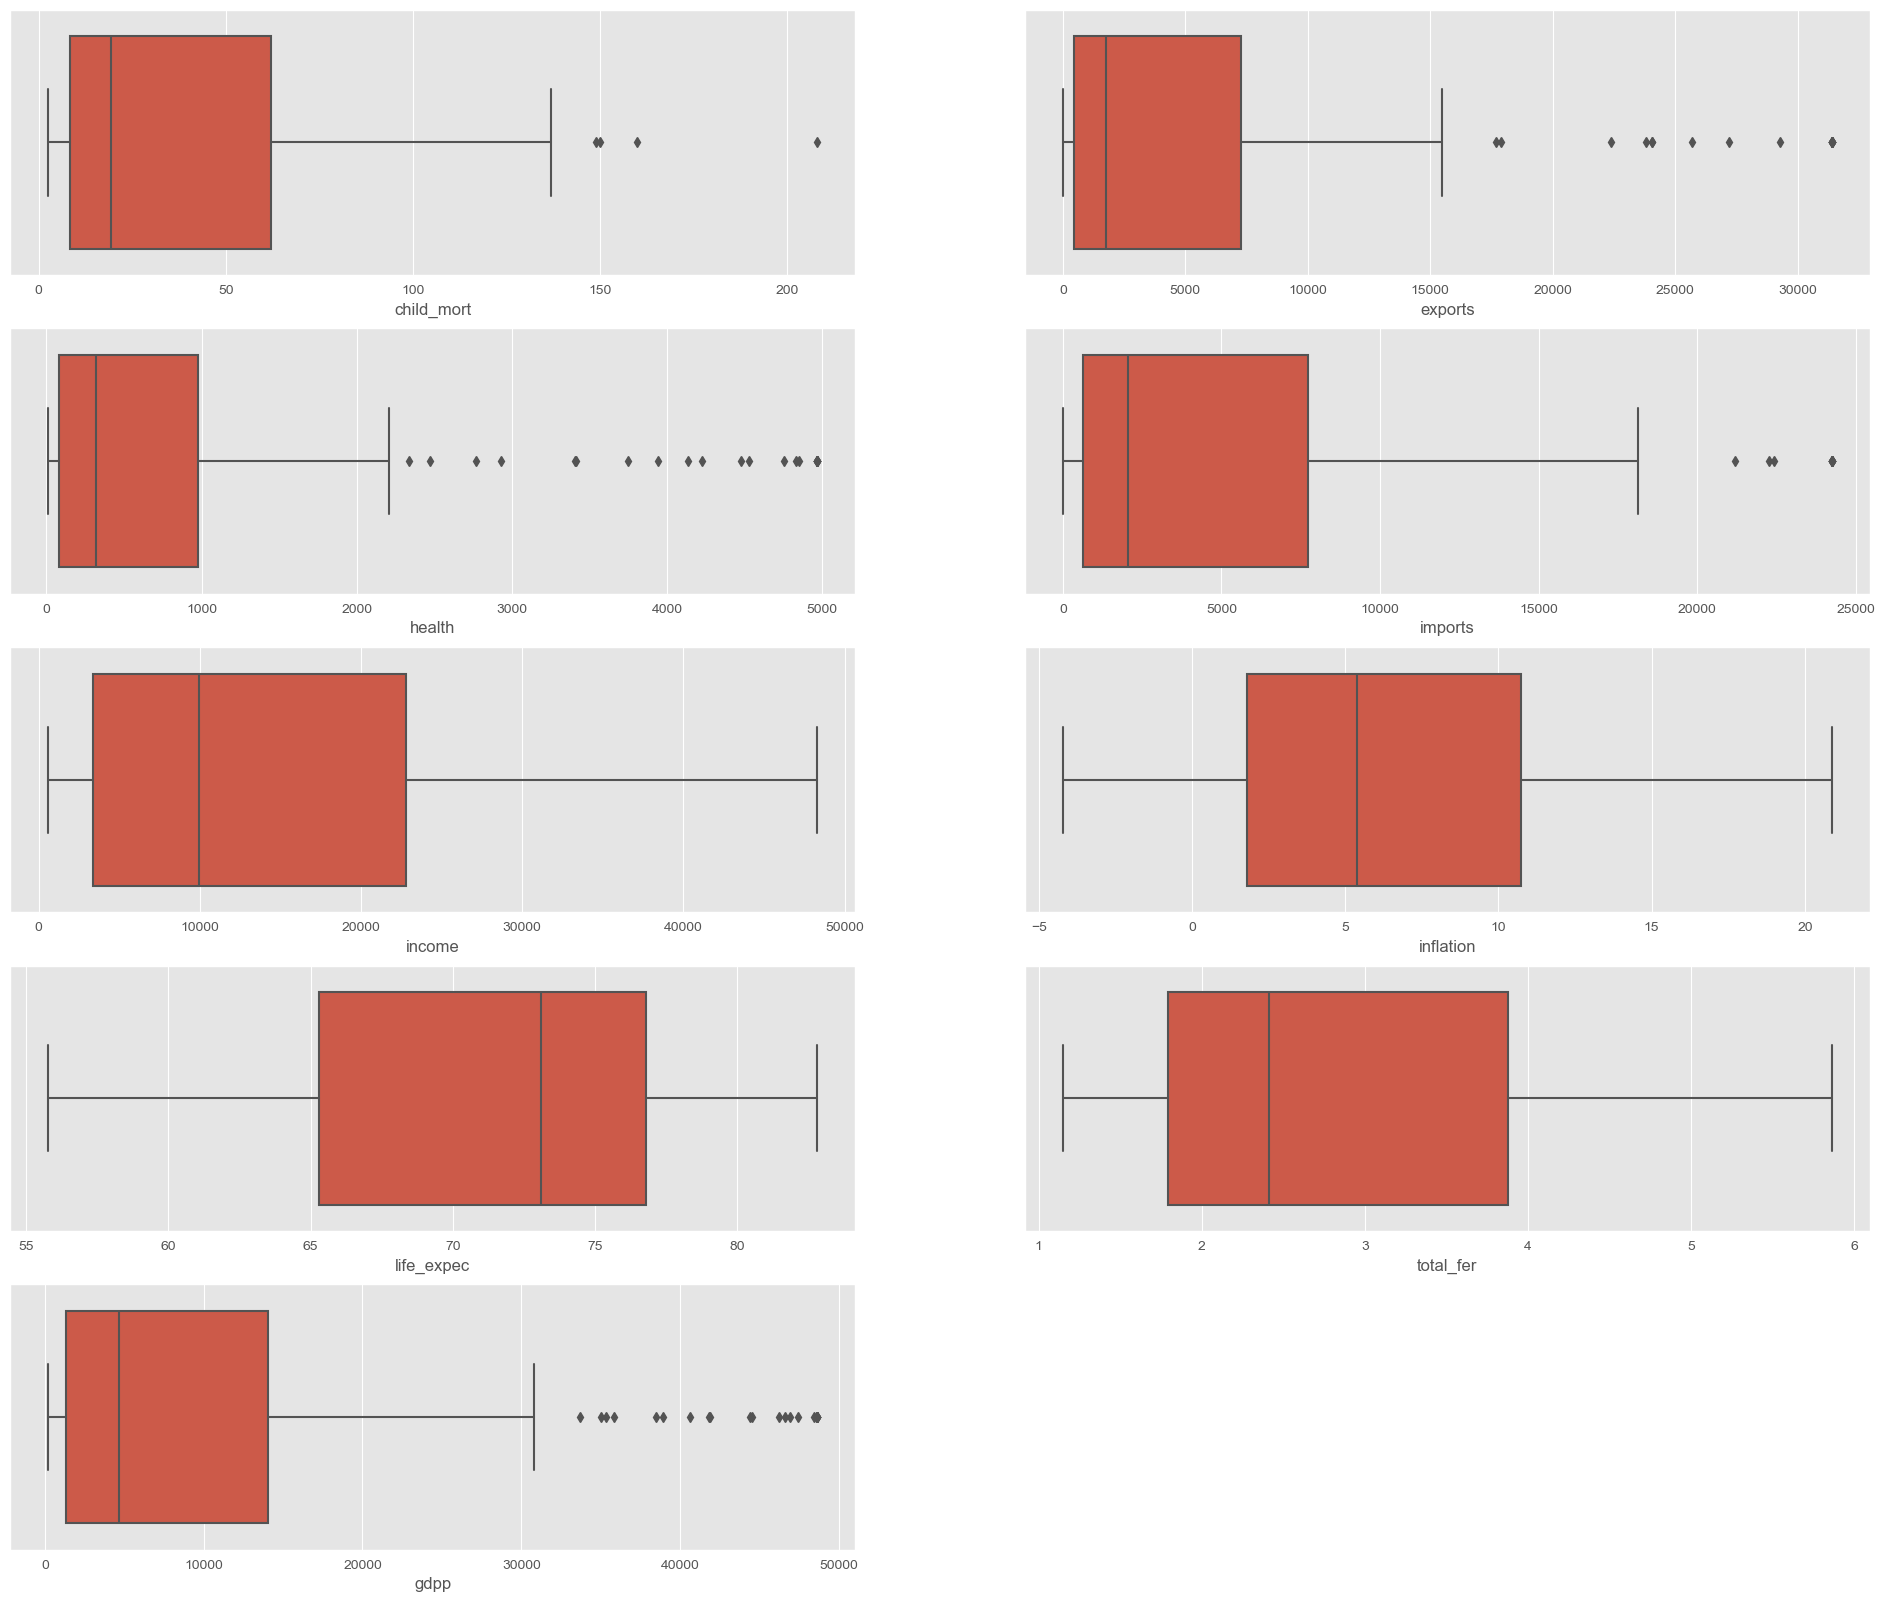

In [28]:
plt.figure(figsize=(24,20))
for i in enumerate(density_features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x= i[1], data = df)

In [29]:
df.describe()

child_mort       exports       health       imports        income  \
count  167.000000    167.000000   167.000000    167.000000    167.000000   
mean    38.270060   5783.114656   954.012480   5140.089474  15738.760479   
std     40.328931   8580.053847  1453.426636   6696.210005  14787.154215   
min      2.600000      1.076920    12.821200      0.651092    609.000000   
25%      8.250000    447.140000    78.535500    640.215000   3355.000000   
50%     19.300000   1777.440000   321.886000   2045.580000   9960.000000   
75%     62.100000   7278.000000   976.940000   7719.600000  22800.000000   
max    208.000000  31385.100000  4966.701000  24241.560000  48290.000000   

        inflation  life_expec   total_fer          gdpp  
count  167.000000  167.000000  167.000000    167.000000  
mean     6.929317   70.863593    2.917479  11998.826347  
std      6.384357    8.085376    1.443771  15158.213199  
min     -4.210000   55.780000    1.150000    231.000000  
25%      1.810000   65.300000    1.795000   1330.000000  
50%      5.390000   73.100000    2.410000   4660.000000  
75%     10.750000   76.800000    3.880000  14050.000000  
max     20.870000   82.800000    5.861000  48610.000000

<a id="norm"></a>
<h2><b><span style="color:#191919">Step 3.5 | </span><span style="color:#86A789">Normalization</span></b></h2>

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍 <code>MinMaxScaler()</code> is a technique used to transform data that falls within a specific range, typically between 0 and 1. This normalization process helps reduce the impact of large values in the dataset.
</span></h5>

In [30]:
country = df.country
df.drop(columns='country', inplace=True)
# Normalize
scaler = MinMaxScaler().fit_transform(df)
norm_df = pd.DataFrame(scaler, columns=df.columns)


<a id="pca"></a>
<h1><p style="padding:15px;background-color:#FDF7E4 ;margin:0;color:#191919;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #86A789">Step 4 | PCA</p></h1>

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍 PCA (Principal Component Analysis) is a technique that reduces the number of features in a dataset while preserving important patterns. It achieves this by transforming the original features into a new set of uncorrelated variables called principal components. This simplification improves computational efficiency, reduces noise, and aids in data visualization and interpretation.
</span></h5>

<a id="ipca"></a>
<h2><b><span style="color:#191919">Step 4.1 | </span><span style="color:#86A789">Initializing PCA</span></b></h2>

In [31]:
pca = PCA(n_components=9).fit(norm_df)
exp = pca.explained_variance_ratio_
print(exp)

[0.70672198 0.13776226 0.07858595 0.03255028 0.01867945 0.01325302
 0.00823535 0.00279766 0.00141406]


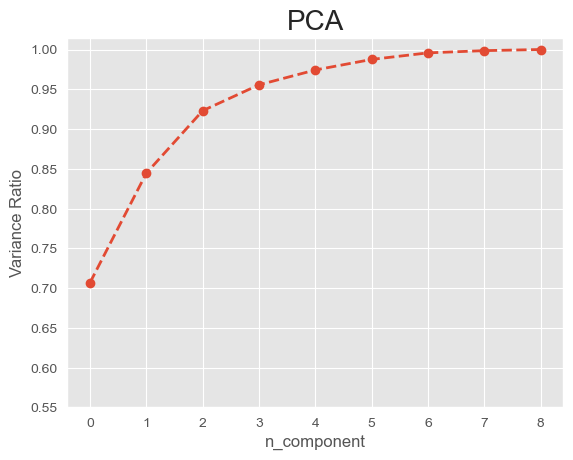

In [32]:
plt.plot(np.cumsum(exp), linewidth=2, marker = 'o', linestyle = '--')
plt.title("PCA", fontsize=20)
plt.xlabel('n_component')
plt.ylabel('Variance Ratio')
plt.yticks(np.arange(0.55, 1.05, 0.05))
plt.show()

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍 n_component=5, has above 95% of result.
</span></h5>

In [33]:
final_pca = IncrementalPCA(n_components=5).fit_transform(norm_df)

In [34]:
final_pca.shape

(167, 5)

In [35]:
pc = np.transpose(final_pca)

In [36]:
corr_pca = np.corrcoef(pc)

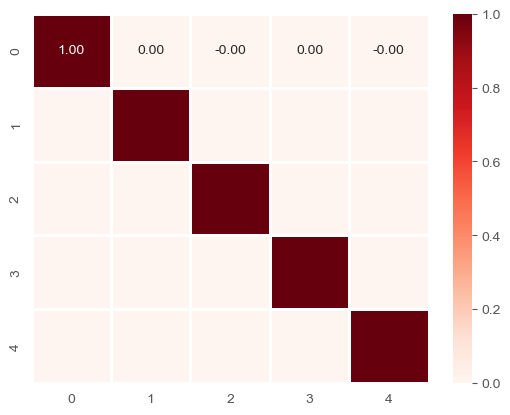

In [37]:
sns.heatmap(data=corr_pca, annot=True, fmt=".2f", linewidth=0.75, cmap="Reds")
plt.show()

In [38]:
pca_df = pd.DataFrame({
    'PC1':pc[0],
    'PC2':pc[1],
    'PC3':pc[2],
    'PC4':pc[3],
    'PC5':pc[4],
})
pca_df

PC1       PC2       PC3       PC4       PC5
0   -0.868026  0.468154 -0.116122  0.015084  0.030630
1   -0.075952 -0.471567 -0.026781 -0.007173  0.019178
2   -0.214388 -0.201541  0.392519  0.091286  0.133112
3   -0.807603  0.610289  0.331504  0.069905  0.046915
4    0.231294 -0.264191 -0.118967 -0.066490  0.102013
..        ...       ...       ...       ...       ...
162 -0.453124 -0.050333 -0.243497 -0.067826 -0.040117
163 -0.038596 -0.112832  0.580115  0.142696  0.001215
164 -0.289604 -0.367720  0.210735  0.004976 -0.049341
165 -0.641633  0.186166  0.429498  0.124173  0.116803
166 -0.832937  0.457908  0.070357  0.016176 -0.056084

[167 rows x 5 columns]

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍Found outliers of each  PCA.
</span></h5>

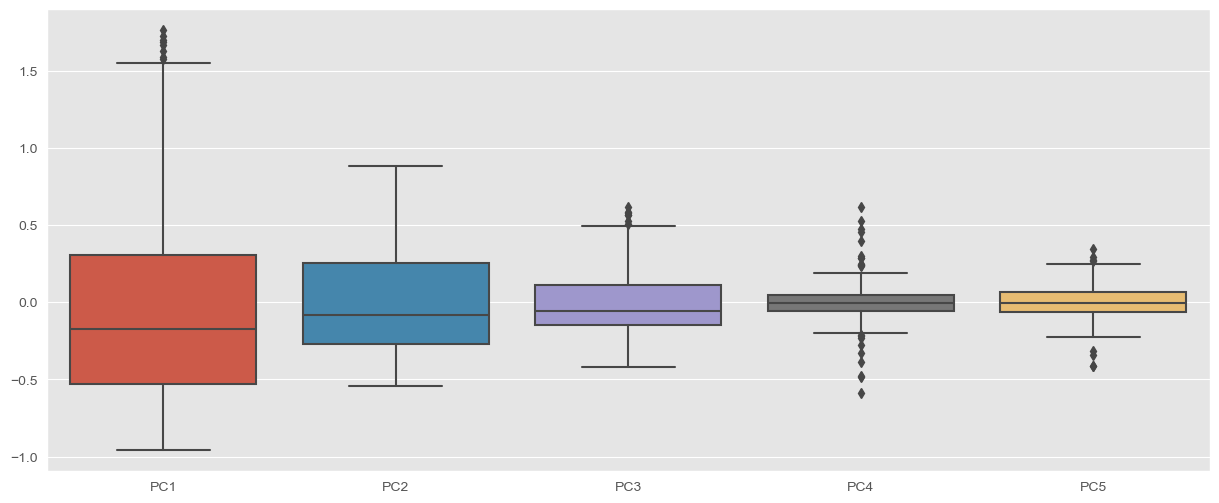

In [39]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=pca_df)
plt.show()

<a id="model"></a>
<h1><p style="padding:15px;background-color:#FDF7E4 ;margin:0;color:#191919;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #86A789">Step 5 | Clustring Model</p></h1>

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍Find best n_clusters for <code>.KMeans</code> .
</span></h5>

<a id="km"></a>
<h2><b><span style="color:#191919">Step 5.1 | </span><span style="color:#86A789"> KMeans</span></b></h2>

In [40]:
kmeans_list = []
kmeans_sil_coef = []
kmeans_calinski_score = []
kmeans_calinski_score = []
kmeans_davies_score = []

for n in range(2, 10) :
    
    # main algorithm
    kmeans = KMeans(n_clusters=n).fit(df)
    kmeans_list.append(kmeans.inertia_)
    
    # Silhouette
    sil_score = silhouette_score(df, kmeans.labels_)
    kmeans_sil_coef.append(sil_score)
    
    # Calinski Harabasz Score
    calinski_score = calinski_harabasz_score(df, kmeans.labels_)
    kmeans_calinski_score.append(calinski_score)

    # Davies Bouldin Score
    davies_score = davies_bouldin_score(df, kmeans.labels_)
    kmeans_davies_score.append(davies_score)



k1 = KneeLocator(range(2, 10), kmeans_list, curve='convex', direction='decreasing')

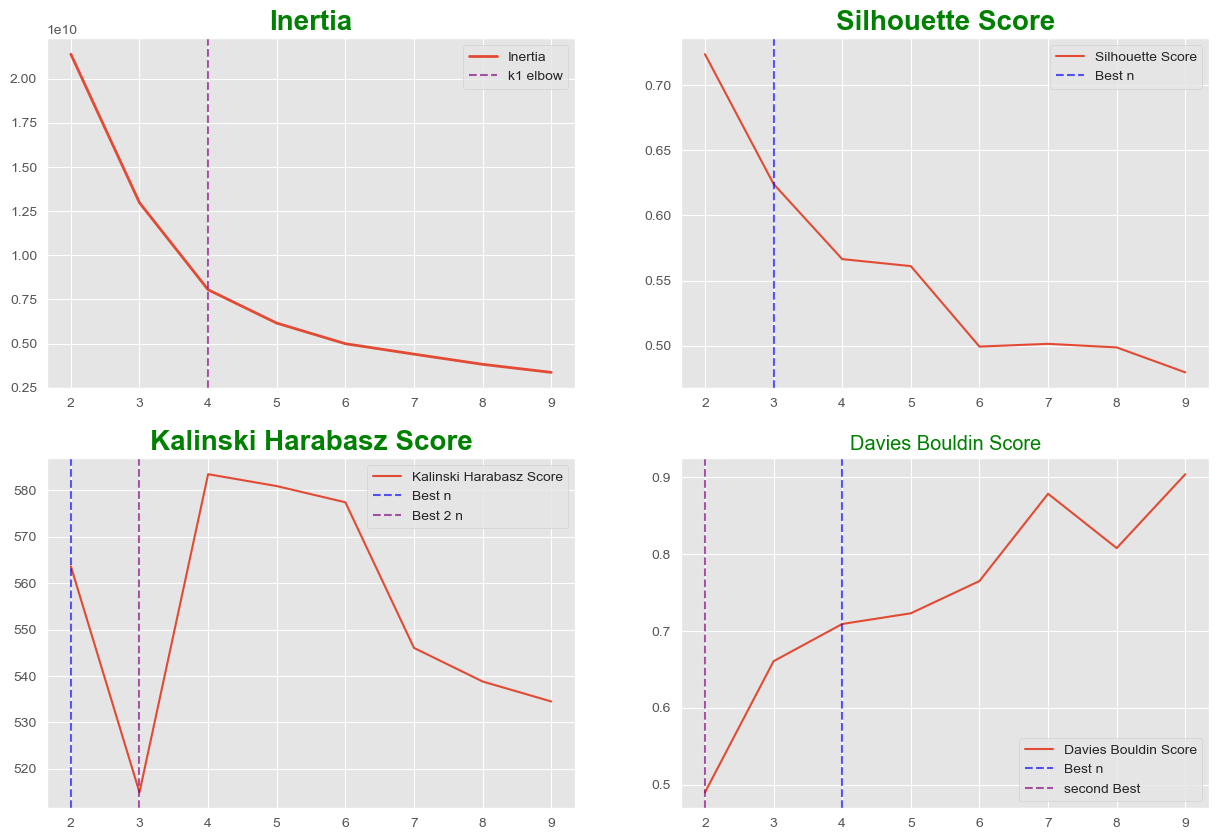

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Ax 1 :  inertia
ax[0, 0].plot(range(2, 10), kmeans_list, label='Inertia', linewidth=2)
ax[0, 0].axvline(x=k1.elbow, ls='--', label='k1 elbow', color='purple', alpha=0.65)
ax[0, 0].set_title('Inertia', fontsize=20, fontweight=600, color='Green')
ax[0, 0].legend()

# Ax 2 : Silhouette Score
ax[0, 1].plot(range(2, 10), kmeans_sil_coef, label='Silhouette Score')
ax[0, 1].set_title('Silhouette Score', fontsize=20, fontweight=600, color='Green')
ax[0, 1].axvline(x=3, ls='--', alpha=0.65, label='Best n', color='Blue')
ax[0, 1].legend()

# Ax 3 : Calinski Harabasz Score
ax[1, 0].plot(range(2, 10),  kmeans_calinski_score, label='Kalinski Harabasz Score')
ax[1, 0].set_title('Kalinski Harabasz Score', fontsize=20, fontweight=600, color='Green')
ax[1, 0].axvline(x=2, ls='--', label='Best n', color='blue', alpha=0.65)
ax[1, 0].axvline(x=3, ls='--', label='Best 2 n', color='purple', alpha=0.65)
ax[1, 0].legend()

# Ax 4 : Davies Bouldin Score
ax[1, 1].plot(range(2, 10), kmeans_davies_score, label='Davies Bouldin Score')
ax[1, 1].set_title('Davies Bouldin Score', fontsize=50, fontweight=700, color='Green')
ax[1, 1].axvline(x=4, ls='--', alpha=0.65, label='Best n', color='Blue')
ax[1, 1].axvline(x=2, ls='--', alpha=0.65, label='second Best', color='purple')
ax[1, 1].set_title('Davies Bouldin Score')
ax[1, 1].legend()


plt.show()

<div style="border-radius:20px; padding: 15px; background-color: #FDF7E4; font-size:100%; text-align:left">
<h5><span style="align:left; color:black; font-weight:500; font-size:110%">
    📍According to the above plots, the best n_clusters for KMeans algorithm is 3.
</span></h5>

<a id="km3"></a>
<h2><b><span style="color:#191919">Step 5.1 | </span><span style="color:#86A789"> KMeans n_clusters=3</span></b></h2>

In [42]:
kmeans = KMeans(n_clusters=3).fit(pca_df)

In [43]:
# add country column
pca_df.insert(0, 'Country', country)
pca_df['class'] = kmeans.labels_

In [44]:
pca_df['Requirement'] = pca_df['class']

In [45]:
rich = int(pca_df[pca_df.Country=='Canada']['class'])
middle = int(pca_df[pca_df.Country=='Iran']['class'])
poor = int(pca_df[pca_df.Country=='Afghanistan']['class'])

In [46]:
rich_label = 'Rich countries'
middle_label = 'Middle countries'
poor_label = 'Poor countries'

In [47]:
pca_df.replace({'Requirement':{rich:rich_label, middle:middle_label, poor:poor_label }},inplace=True)

In [48]:
pca_df.head()

Country       PC1       PC2       PC3       PC4       PC5  \
0          Afghanistan -0.868026  0.468154 -0.116122  0.015084  0.030630   
1              Albania -0.075952 -0.471567 -0.026781 -0.007173  0.019178   
2              Algeria -0.214388 -0.201541  0.392519  0.091286  0.133112   
3               Angola -0.807603  0.610289  0.331504  0.069905  0.046915   
4  Antigua and Barbuda  0.231294 -0.264191 -0.118967 -0.066490  0.102013   

   class       Requirement  
0      2    Poor countries  
1      0  Middle countries  
2      0  Middle countries  
3      2    Poor countries  
4      0  Middle countries

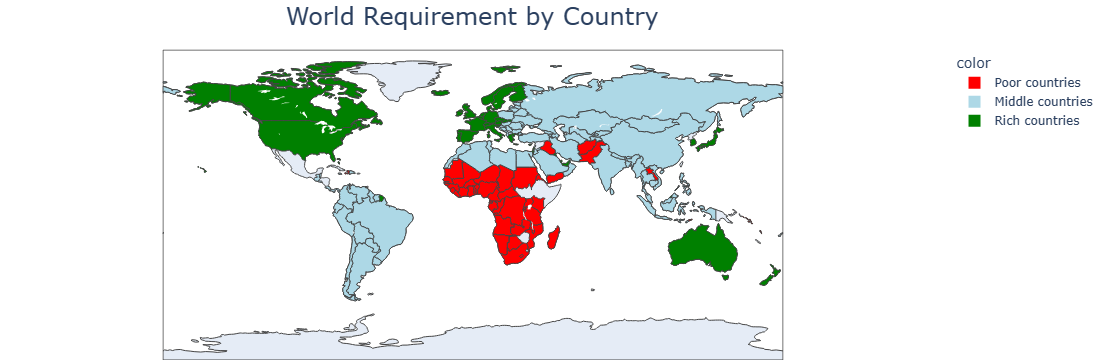

In [49]:
fig = px.choropleth(pca_df[['Country','class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    color = pca_df['Requirement'],  
                    color_discrete_map = {'Rich countries': 'Green',
                                          'Middle countries':'LightBlue',
                                          'Poor countries':'Red'}
                   )

fig.update_layout(
    title='World Requirement by Country', 
    title_font_size=24,
    title_x=0.26,
        margin = dict(
                l=10,
                r=0,
                b=0,
                t=50,
                pad=5,
            ),
    )
fig.show()

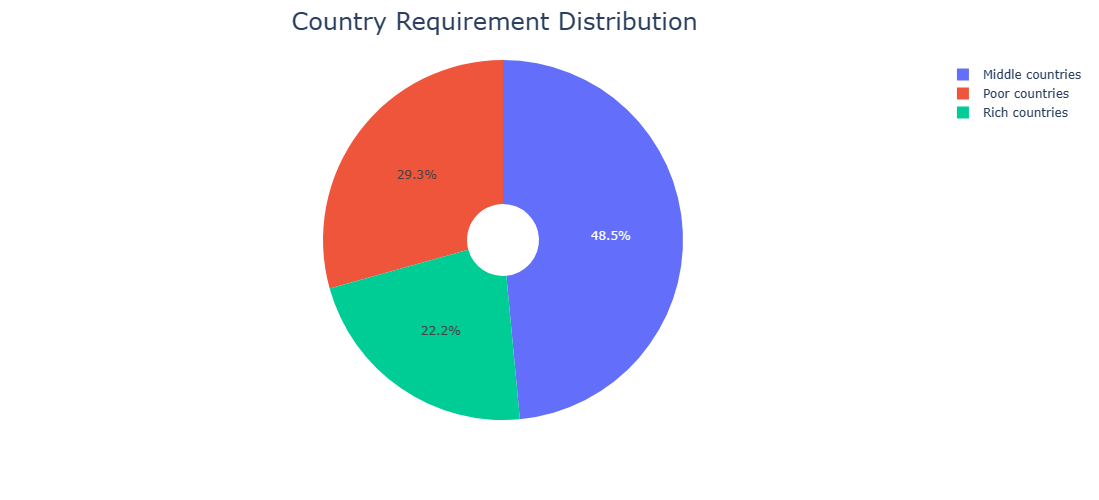

In [50]:
req_counts = pca_df['Requirement'].value_counts()
fig = px.pie(pca_df, names=req_counts.index, values=req_counts.values,
              hole=0.2, width=1100, height=500
            )
fig.update_layout(title='Country Requirement Distribution', title_x=0.45, title_font=dict(size=24))

fig.show()

<a id="author"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #FDF7E4; font-size:130%; text-align:left">

<h4 align="left"><span style="font-weight:700; font-size:130%"><font color=#86A789>Author:</font><font color=#191919> Mohammadaref Ahmadpoor</font></span></h4>
<h6 align="left"><font color=#191919><a href='https://github.com/ahmadpoor79'>github: https://github.com/ahmadpoor79</font></h6>
<h6 align="left"><font color=#191919><a href='https://www.kaggle.com/ahmadpour79'>kaggle : https://www.kaggle.com/ahmadpour79</a></font></h6>
<h6 align="left"><font color=#191919><a href='https://www.linkedin.com/in/mohammadaref-ahmadpoor-8b789b230/'>linkedin : www.linkedin.com/in/mohammadaref-ahmadpoor-8b789b230/</a></font></h6>